<a href="https://colab.research.google.com/github/Shreyaprashanth/Samsung__Innovation__Campus/blob/main/air_pollution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install -q kagglehub


In [ ]:
import kagglehub
import pandas as pd
import os
###############################################################
# Specify the dataset identifier (user/dataset-name) and the file within the dataset
dataset_owner = "sazidthe1"
dataset_name = "global-air-pollution-data"
dataset_handle = f"{dataset_owner}/{dataset_name}"
###############################################################
# Download the dataset to a local directory
local_path = kagglehub.dataset_download(dataset_handle)
###############################################################
# List the contents of the downloaded directory to find the correct file path
print(f"Dataset downloaded to: {local_path}")
###############################################################
print("Contents of the dataset:")
###############################################################
for root, dirs, files in os.walk(local_path):
    level = root.replace(local_path, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')
###############################################################
# Once you find the correct file path, replace "SouthAfricaCrimeStats_v2.csv"
# with the correct path and uncomment the line below to load the data into a DataFrame.
file_path_within_dataset = "global_air_pollution_data.csv"
###############################################################
df = pd.read_csv(os.path.join(local_path, file_path_within_dataset))
###############################################################
# display(df.head())
df.head()

100%|██████████| 371k/371k [00:00<00:00, 723kB/s]

Extracting files...
Dataset downloaded to: /root/.cache/kagglehub/datasets/sazidthe1/global-air-pollution-data/versions/3
Contents of the dataset:
3/
    global_air_pollution_data.csv


,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good


In [ ]:
df.shape

(23463, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   country_name        23036 non-null  object
 1   city_name           23462 non-null  object
 2   aqi_value           23463 non-null  int64 
 3   aqi_category        23463 non-null  object
 4   co_aqi_value	       23463 non-null  int64 
 5   co_aqi_category     23463 non-null  object
 6   ozone_aqi_value     23463 non-null  int64 
 7   ozone_aqi_category  23463 non-null  object
 8   no2_aqi_value       23463 non-null  int64 
 9   no2_aqi_category    23463 non-null  object
 10  pm2.5_aqi_value     23463 non-null  int64 
 11  pm2.5_aqi_category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


In [ ]:
cluster_df=df.drop(['country_name','city_name','aqi_category','co_aqi_category','ozone_aqi_category','no2_aqi_category','pm2.5_aqi_category'],axis=1)
cluster_df

,aqi_value,co_aqi_value\t,ozone_aqi_value,no2_aqi_value,pm2.5_aqi_value
0,51,1,36,0,51
1,41,1,5,1,41
2,66,1,39,2,66
3,34,1,34,0,20
4,22,0,22,0,6
...,...,...,...,...,...
23458,184,3,154,2,184
23459,50,1,20,5,50
23460,50,1,22,1,50
23461,71,1,44,2,71


In [ ]:
from sklearn.cluster import KMeans
cluster = KMeans(n_clusters=3, random_state=0)

cluster.fit(cluster_df)

KMeans(n_clusters=3, random_state=0)

In [ ]:
cluster.fit_predict(cluster_df)

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [ ]:
df['aqi_value'] = cluster.fit_predict(cluster_df)

df.head()

,country_name,city_name,aqi_value,aqi_category,co_aqi_value\t,co_aqi_category,ozone_aqi_value,ozone_aqi_category,no2_aqi_value,no2_aqi_category,pm2.5_aqi_value,pm2.5_aqi_category
0,Russian Federation,Praskoveya,1,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,1,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,1,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,1,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,1,Good,0,Good,22,Good,0,Good,6,Good


<Axes: >

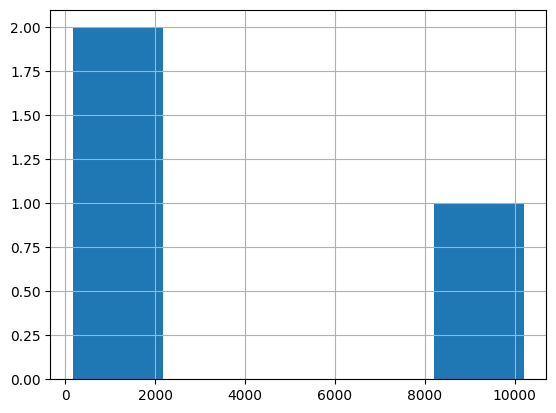

In [ ]:
df['pm2.5_aqi_category'].value_counts().hist()

/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:123: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


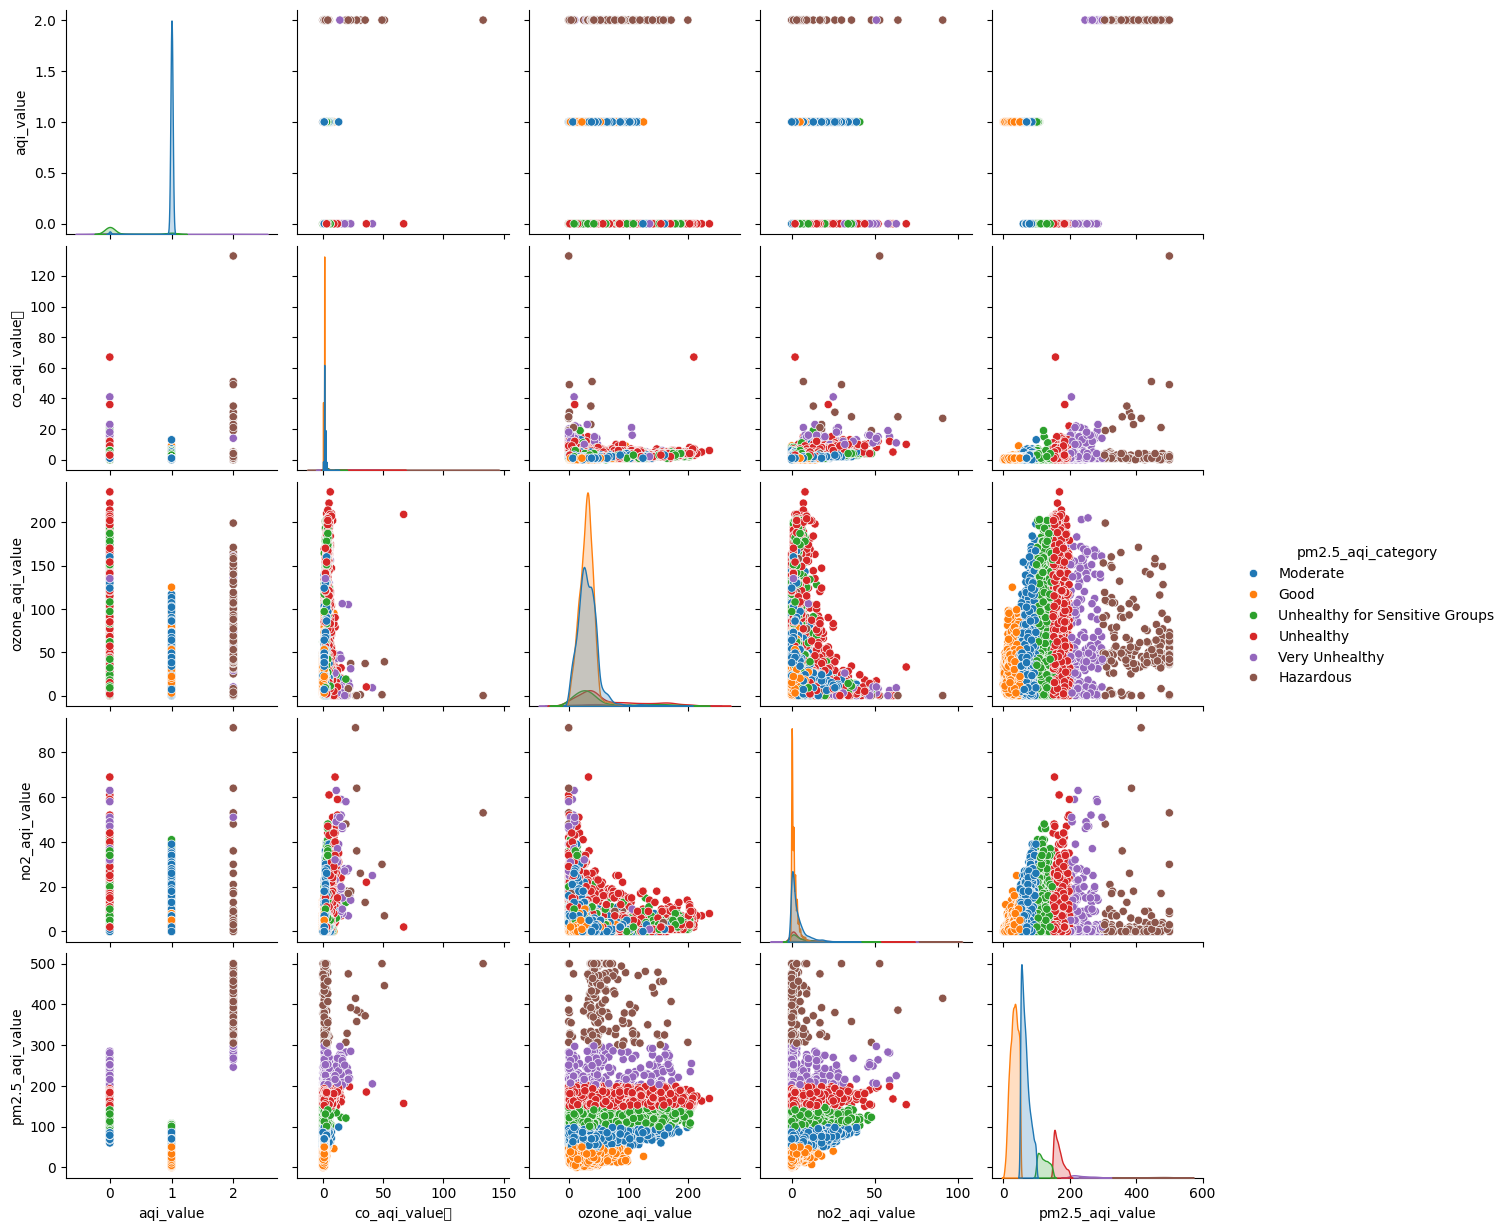

In [ ]:
import seaborn as sns

sns.pairplot(df, hue='pm2.5_aqi_category',palette='tab10')

In [ ]:
import seaborn as sns

/usr/local/lib/python3.11/dist-packages/seaborn/utils.py:61: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.draw()


<Axes: >

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


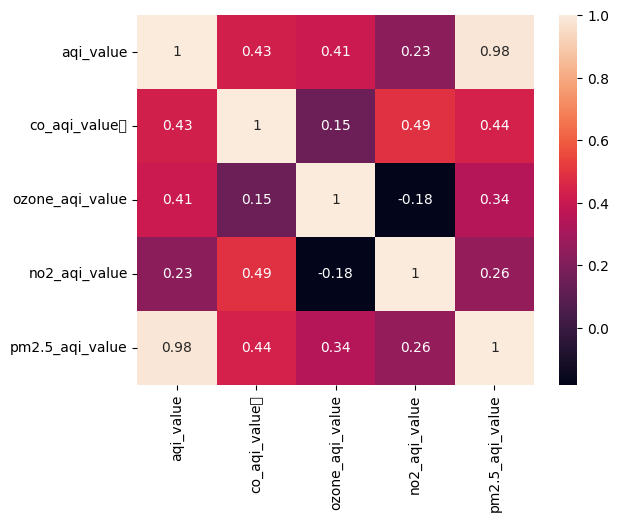

In [ ]:
sns.heatmap(cluster_df.corr(), annot=True)

<Axes: xlabel='ozone_aqi_value', ylabel='pm2.5_aqi_category'>

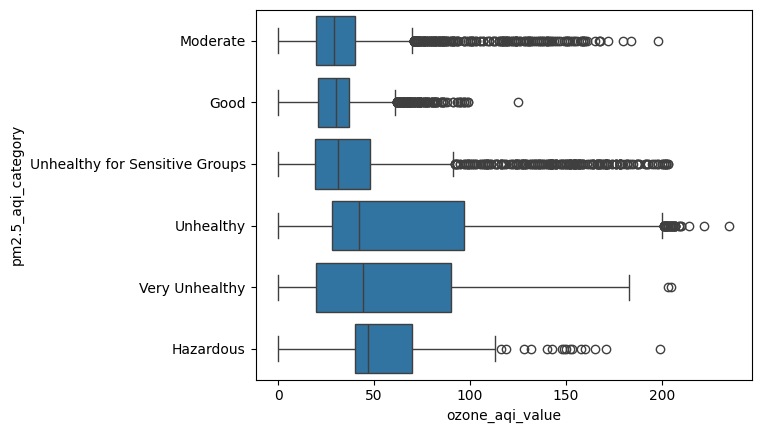

In [ ]:
sns.boxplot(x=df['ozone_aqi_value'],y=df['pm2.5_aqi_category'])

<Axes: xlabel='ozone_aqi_value', ylabel='pm2.5_aqi_value'>

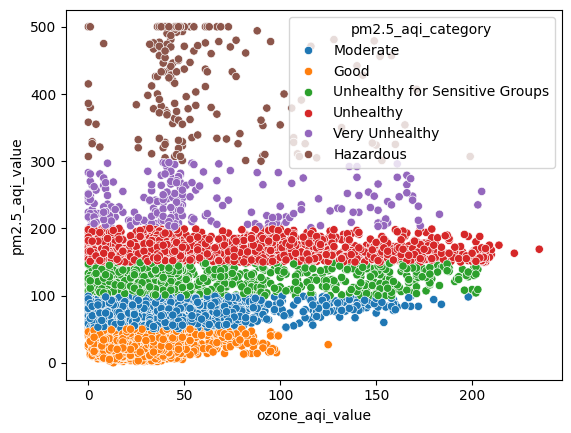

In [ ]:
sns.scatterplot(x=df['ozone_aqi_value'],
            y=df['pm2.5_aqi_value'],
            hue=df['pm2.5_aqi_category'],
            palette='tab10')